In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import plot_model
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
# Run this only once. The code below saves the samples and labels as numpy arrays, so that we don't need to waste time running this over and over again
dataset = []
for dirname, _, filenames in tqdm(os.walk('/content/drive/MyDrive/Ashwin/Deep Learning/Project/New Data')):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        #print(os.path.join(dirname, filename))
        if path.endswith("jpg" or 'JPG'):
            dataset.append(path)
        elif path.endswith('JPEG' or 'jpeg'):
            dataset.append(path)
        elif path.endswith('png' or 'PNG'):
            dataset.append(path)

print(str(len(dataset))+ " images uploaded to dataset")

6it [01:00, 10.12s/it]

19974 images uploaded to dataset


In [ ]:
X = []
y = []
count = 0
for path in tqdm(dataset):
    try:
        img = cv2.imread(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (128, 128))  # Change Resolution
        X.append(img)  
        category = path.split("/")[8]
        y.append(category)
    except:
        print(path)

In [ ]:
X = np.load('/content/drive/MyDrive/Ashwin/Deep Learning/Project/X.npy')
y = np.load('/content/drive/MyDrive/Ashwin/Deep Learning/Project/y.npy')

In [ ]:
size = len(X)
X = np.array(X)
#np.save('/content/drive/MyDrive/Ashwin/Deep Learning/Project/X.npy', X)

In [ ]:
X = X  / 255.0
X = X.reshape(size, 128, 128, 1)


In [ ]:
label_enc = LabelEncoder()
y = np.array(label_enc.fit_transform(y))
#np.save('/content/drive/MyDrive/Ashwin/Deep Learning/Project/y.npy', y)
print(X.shape, y.shape)

(19972, 128, 128, 1) (19972,)


In [ ]:
lab = pd.DataFrame({"Y": y})
lab["Y"].value_counts()

1    4000
0    4000
4    3999
2    3990
3    3983
Name: Y, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 777, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(17974, 128, 128, 1) (1998, 128, 128, 1) (17974,) (1998,)


In [ ]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(5, activation='softmax'))

In [ ]:
lr = 0.8e-5
adam = Adam(learning_rate = lr)
model.compile(optimizer = adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor = 0.5, patience = 10, min_lr = 8e-6, verbose=1)

In [ ]:
track = []

In [ ]:
def scheduler(epoch, lr):
    if epoch > 500 or epoch > 1000 or epoch > 1500:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
        print("Learning rate adjusted to " + str(lr * tf.math.exp(-0.1)))
callbacks = [schedule]
schedule = LearningRateScheduler(scheduler)

In [ ]:
Epochs = 1500
history = model.fit(X_train, y_train, epochs = Epochs, batch_size = 100, verbose = 1, validation_data = (X_test, y_test))
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
record = (current_time, lr,  history, Epochs)
track.append(record)   # To store parameters of different results

Epoch 1/1500
180/180 [==============================] - 5s 22ms/step - loss: 2.0812 - accuracy: 0.1974 - val_loss: 1.6296 - val_accuracy: 0.2002
Epoch 2/1500
180/180 [==============================] - 4s 20ms/step - loss: 1.9654 - accuracy: 0.2253 - val_loss: 1.6512 - val_accuracy: 0.2938
Epoch 3/1500
180/180 [==============================] - 4s 20ms/step - loss: 1.9183 - accuracy: 0.2538 - val_loss: 1.6036 - val_accuracy: 0.2783
Epoch 4/1500
180/180 [==============================] - 4s 20ms/step - loss: 1.8572 - accuracy: 0.2661 - val_loss: 1.5575 - val_accuracy: 0.2998
Epoch 5/1500
180/180 [==============================] - 4s 20ms/step - loss: 1.8089 - accuracy: 0.2834 - val_loss: 1.5281 - val_accuracy: 0.3038
Epoch 6/1500
180/180 [==============================] - 4s 20ms/step - loss: 1.7727 - accuracy: 0.2933 - val_loss: 1.5156 - val_accuracy: 0.3153
Epoch 7/1500
180/180 [==============================] - 4s 20ms/step - loss: 1.7480 - accuracy: 0.3047 - val_loss: 1.5152 - val_ac

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 5ms/step - loss: 0.5290 - accuracy: 0.8363


[0.5289994478225708, 0.8363363146781921]

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 124, 124, 32)      832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)       

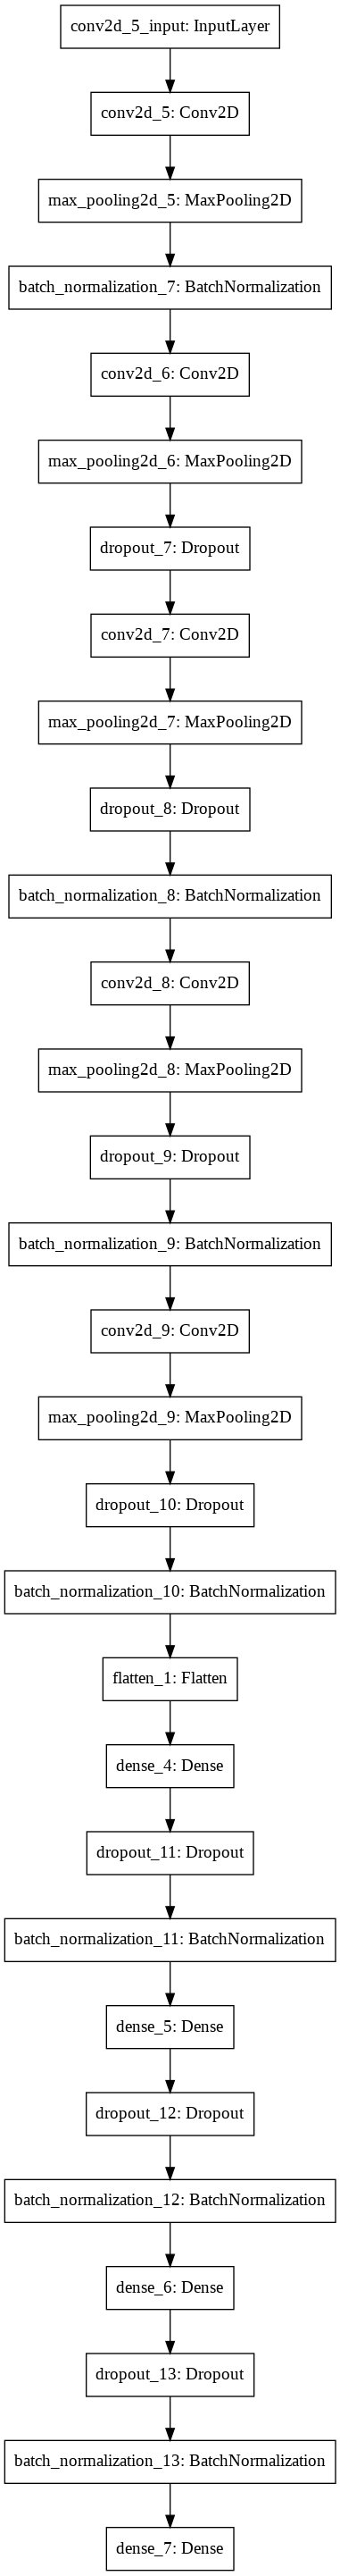

In [ ]:
plot_model(model)

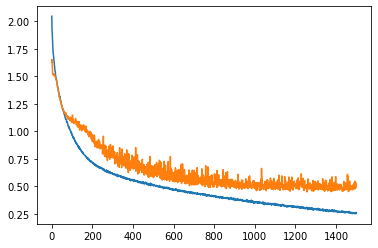

In [ ]:
tr = history.history['loss']
va = history.history['val_loss']
ac = history.history['accuracy']
vac = history.history['val_accuracy']
epoc = range(0, Epochs)
plt.plot(epoc, tr, va)

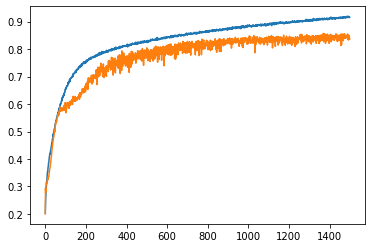

In [ ]:
plt.plot(epoc, ac, vac)

Old Results: For my Reference

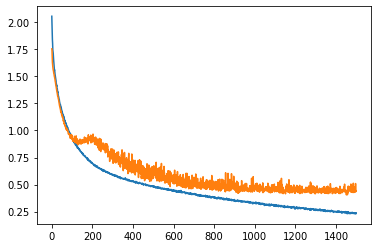

In [ ]:
##ep = track[-1][3]
tr = history.history['loss']
va = history.history['val_loss']
ac = history.history['accuracy']
vac = history.history['val_accuracy']
epoc = range(0, Epochs)
plt.plot(epoc, tr, va)

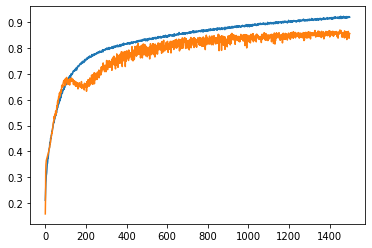

In [ ]:
plt.plot(epoc, ac, vac)

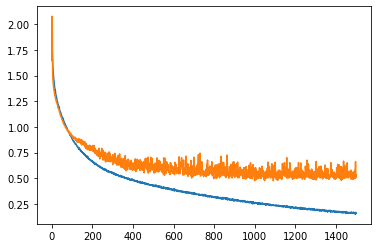

In [ ]:
std = track[-2][2]
ep = track[-2][3]
tr = std.history['loss']
va = std.history['val_loss']
ac = std.history['accuracy']
epoc = range(0, ep)
plt.plot(epoc, tr, va)

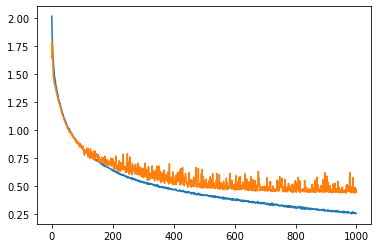

In [ ]:
std = track[-3][2]
tr = std.history['loss']
va = std.history['val_loss']
ac = std.history['accuracy']
ep = track[-3][3]
epoc = range(0, ep)
plt.plot(epoc, tr, va)

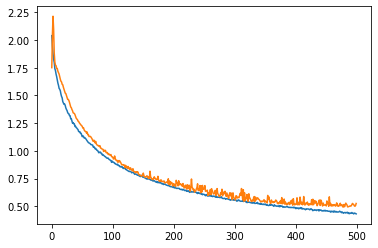

In [ ]:
std = track[-4][2]
tr = std.history['loss']
va = std.history['val_loss']
ac = std.history['accuracy']
ep = track[-4][3]
epoc = range(0, ep)
plt.plot(epoc, tr, va)

In [ ]:
model.save('/content/drive/MyDrive/Ashwin/Deep Learning/Project/DlProject1_M2.h5')